In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/Users/viswaksenajayam/Downloads/4thsem/MachineLearning/car_price_dataset/data.csv")

In [6]:
len(df) #no of rows in the dataset

11914

In [7]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.columns = df.columns.str.lower().str.replace(" ","_") #1st row
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ","_")# entire dataset

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


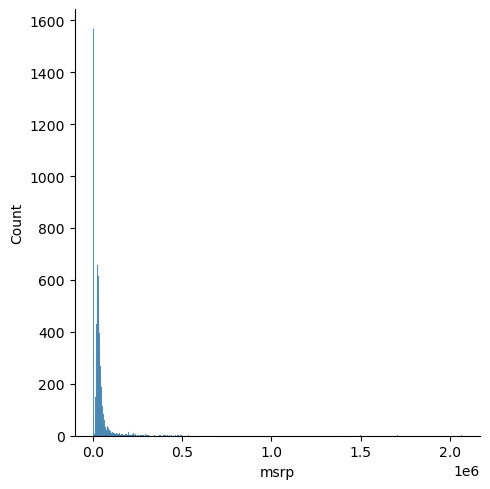

In [10]:
sns.displot(df.msrp,kde=False)

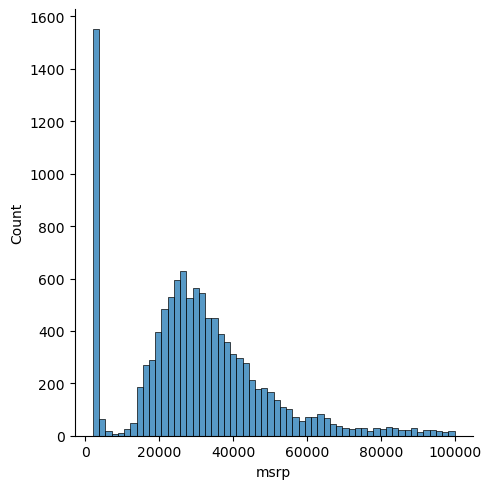

In [11]:
sns.displot(df.msrp[df.msrp<100000],kde = False)

In [12]:
log_price = np.log1p(df.msrp) #Adding log+1 to remove long tail at last # "1" is for if any non negative values

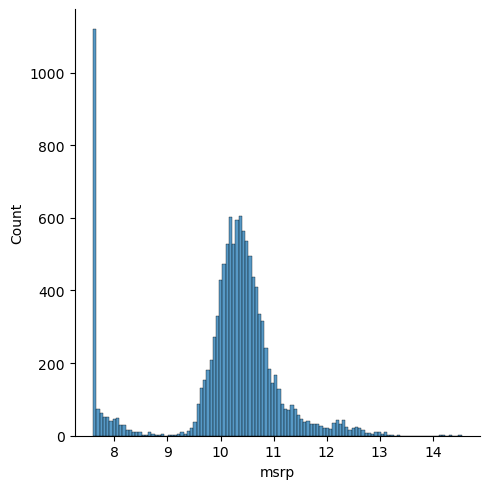

In [13]:
sns.displot(log_price,kde=False)

In [14]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [15]:
n = len(df)
n

11914

In [16]:
idx = np.arange(n)
np.random.shuffle(idx)

In [17]:
n_test = int(0.2*n) # 20% of test
n_val = int(0.2*n) # 20% of validation
n_train = n-n_test-n_val # Remaining training

df_test = df.iloc[idx[:n_test]]  # allocating first 
df_val= df.iloc[idx[n_test:n_test+n_val]] 
df_train = df.iloc[idx[n_val+n_test:]]

In [18]:
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [19]:
df_train.iloc[10]

make                            suzuki
model                           esteem
year                              2001
engine_fuel_type      regular_unleaded
engine_hp                        122.0
engine_cylinders                   4.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                   compact
vehicle_style                    wagon
highway_mpg                         30
city_mpg                            26
popularity                         481
msrp                             14699
Name: 4233, dtype: object

# Linear Regression

In [20]:
xi = [210,29,873] # Feature matrix
w0 = 7.17 #Bias Term
w = [0.01,0.04,0.02]

In [21]:
def linearRegression(xi):
    n = len(xi)
    pred = w0
    for i in range(n):
        pred = pred + w[i]*xi[i]
    return pred

In [22]:
linearRegression(xi)

27.89

In [23]:
np.expm1(27.89)

1295606446605.0498

In [24]:
np.log1p(1295606446605.0498)

27.89

# Linear Regression Vector From

In [25]:
def dot(xi,w):
    n = len(xi)
    res = 0.0
    for i in range(n):
        res = res + xi[i] * w[i]
    return res

In [26]:
def vecLinearRegression(xi):
    return w0+dot(xi,w)

In [27]:
w_new = [w0]+w
w_new

[7.17, 0.01, 0.04, 0.02]

In [28]:
def vecLinearRegression(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [29]:
vecLinearRegression(xi) #Same Result

27.89

## Multiple Row Prediction using Vector LinearRegression

In [30]:
xi = [210,29,873] # Feature matrix
w0 = 7.17 #Bias Term
w = [0.01,0.04,0.02]
w_new = [w0] + w

In [31]:
x1 = [1, 148, 24, 1385] 
x2 = [1, 132, 25, 2031] 
x10 = [1, 210,29,873]
X = [x1,x2,x10]
X =np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  210,   29,  873]])

In [32]:
def mulVecLinearRegression(X):
    return X.dot(w_new)

In [33]:
mulVecLinearRegression(X)

array([37.31, 50.11, 27.89])

# Training Linear Regression

In [34]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [35]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [36]:
def trainLinearRegression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [37]:
trainLinearRegression(X,y)

(25844.754055766785, array([ -16.08906468, -199.47254894,   -1.22802883]))

# Car Price Baseline Model

In [38]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [39]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [40]:
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

In [41]:
X_train = df_train[base].values
X_train = df_train[base].fillna(0).values #Engine Morepower

In [42]:
w0,w = trainLinearRegression(X_train,y_train)

In [43]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

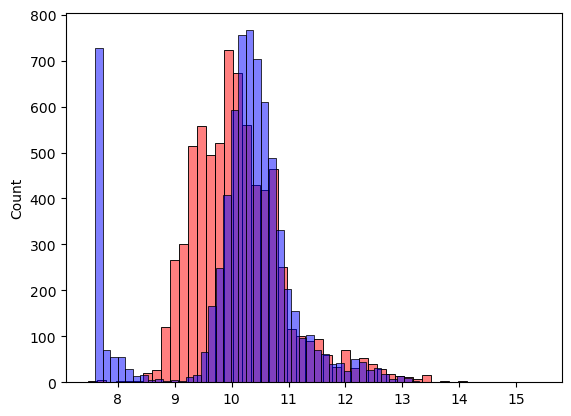

In [44]:
sns.histplot(y_pred , color = 'red', bins = 50, alpha = 0.5) #alpha for transparent
sns.histplot(y_train , color = 'blue', bins = 50, alpha = 0.5)

# Root Mean Squared Error

In [45]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = np.mean(se)
    return np.sqrt(mse)

In [46]:
rmse(y_train,y_pred)

0.7446603718367139

# Validating the Model

In [47]:
def prepare_x(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [48]:
X_train = prepare_x(df_train)
w0,w = trainLinearRegression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val,y_pred)

0.7531444527034427

# Simple feature engineering

In [49]:
2017- df_train.year

4102      2
4875      1
1421      0
11692    10
9889      0
         ..
8263      0
4858      2
2271      5
9614      0
9288     10
Name: year, Length: 7150, dtype: int64

In [50]:
def prepare_x(df):
    df = df.copy()
    df['age'] = 2017- df['year']
    features = base +['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [51]:
X_train = prepare_x(df_train)
w0, w = trainLinearRegression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5249210824119377

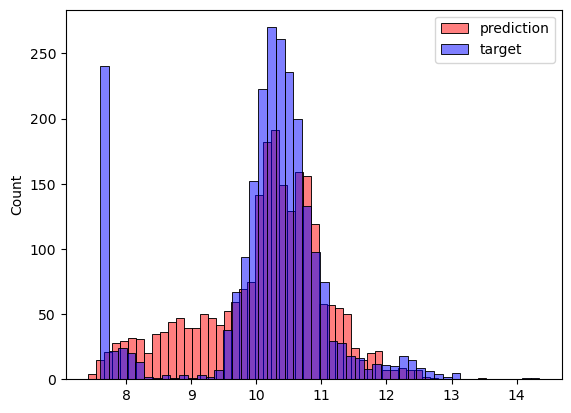

In [52]:
sns.histplot(y_pred , label = 'prediction' , color = 'red', bins = 50, alpha = 0.5) #alpha for transparent
sns.histplot(y_val , label = 'target' , color = 'blue', bins = 50, alpha = 0.5)
plt.legend()

# Categorical Values  -->with objects

In [53]:
(df_train.number_of_doors == 4).astype(int) #astype type is used for to represent in binary form

4102     1
4875     1
1421     1
11692    1
9889     1
        ..
8263     0
4858     0
2271     1
9614     0
9288     1
Name: number_of_doors, Length: 7150, dtype: int64

In [54]:
for v in [2,3,4]:
    df = df.copy()
    df_train['num_doors_%s' %v] = (df_train.number_of_doors == v).astype(int)

In [55]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,num_doors_2,num_doors_3,num_doors_4
4102,cadillac,escalade_esv,2015,flex-fuel_(unleaded/e85),420.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury,performance",large,4dr_suv,20,14,1624,87070,0,0,1
4875,kia,forte,2016,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,39,26,1720,17700,0,0,1
1421,nissan,altima,2017,regular_unleaded,270.0,6.0,automatic,front_wheel_drive,4.0,performance,midsize,sedan,32,22,2009,32690,0,0,1
11692,suzuki,xl7,2007,regular_unleaded,252.0,6.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,22,16,481,25949,0,0,1
9889,chevrolet,spark,2017,regular_unleaded,98.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,38,29,1385,14825,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8263,land_rover,range_rover_evoque,2017,premium_unleaded_(recommended),240.0,4.0,automatic,all_wheel_drive,2.0,"crossover,luxury",compact,2dr_suv,29,21,258,45700,1,0,0
4858,kia,forte,2015,regular_unleaded,173.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,34,25,1720,19590,1,0,0
2271,gmc,canyon,2012,regular_unleaded,242.0,5.0,automatic,four_wheel_drive,4.0,NaN,compact,crew_cab_pickup,21,16,549,29125,0,0,1
9614,chevrolet,silverado_1500,2017,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,22,17,1385,33550,1,0,0


In [56]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017- df['year']
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' %v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [57]:
X_train = prepare_x(df_train)
w0, w = trainLinearRegression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.523320736168156

In [58]:
makes = list(df.make.value_counts().head().index) # single catogory as "make"

In [59]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017- df['year']
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' %v)
    
    for v in makes:
        df['make_%s' %v] = (df.make == v).astype(int)
        features.append('make_%s' %v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [60]:
X_train = prepare_x(df_train)
w0, w = trainLinearRegression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5134810248802736

In [61]:
# multiple Categories
catogerical_variables = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style'
]

In [62]:
catogeries = {}
for c in catogerical_variables:
    catogeries[c] = list(df[c].value_counts().head().index)

In [63]:
catogeries

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [64]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017- df['year']
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' %v)
    
    for c,values in catogeries.items():
        for v in values:
            df['%s%s' %(c,v)] = (df[c] == v).astype(int)
            features.append('%s%s' %(c,v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [65]:
X_train = prepare_x(df_train)
w0, w = trainLinearRegression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

17.213892952533705

# Reguralization

In [66]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]
X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [67]:
y = [1,2,3,1,2,3]

In [68]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [69]:
XTX_inv = np.linalg.inv(XTX)

In [70]:
XTX_inv.dot(X.T).dot(y)

array([ 8.39894892e-01,  3.44329390e+06, -3.44329299e+06])

In [71]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [72]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [73]:
XTX = XTX+0.01*np.eye(3)

In [74]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [75]:
def trainLinearRegressionRegularisation(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX+r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

In [76]:
X_train = prepare_x(df_train)
w0, w = trainLinearRegressionRegularisation(X_train, y_train,r=0.001)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4682745963208749

# Tuning the Model

In [77]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_x(df_train)
    w0, w = trainLinearRegressionRegularisation(X_train, y_train,r=r)

    X_val = prepare_x(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r,w0,score)

0.0 17811744919422.4 17.213892952533705
1e-05 7.922732684750583 0.4682809322252603
0.0001 7.924964995435507 0.4682803397867647
0.001 7.922300617547295 0.4682745963208749
0.1 7.673942915959107 0.46781228497609884
1 6.506208138388608 0.4685389053867166
10 4.700774655122166 0.482706272026673


In [78]:
r = 0.001
X_train = prepare_x(df_train)
w0, w = trainLinearRegressionRegularisation(X_train, y_train,r=r)
X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4682745963208749

# Using this model

In [80]:
df_fullTrain = pd.concat([df_train,df_val])

In [84]:
df_fullTrain = df_fullTrain.reset_index(drop = True) #delete the index instead of inserting it back into the 
                                                        #columns of the DataFrame

In [85]:
X_fullTrain = prepare_x(df_fullTrain)

In [86]:
X_fullTrain

array([[420.,   8.,  20., ...,   0.,   0.,   0.],
       [145.,   4.,  39., ...,   0.,   0.,   0.],
       [270.,   6.,  32., ...,   0.,   0.,   0.],
       ...,
       [ 74.,   4.,  34., ...,   1.,   0.,   0.],
       [470.,  12.,  19., ...,   0.,   0.,   0.],
       [207.,   6.,  18., ...,   0.,   0.,   0.]])

In [88]:
y_fullTrain = np.concatenate([y_train,y_val])

In [91]:
w0, w = trainLinearRegressionRegularisation(X_fullTrain, y_fullTrain,r=0.001)

In [93]:
X_test = prepare_x(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.5129372070911362

In [97]:
car = df_test.iloc[20].to_dict()
car

{'make': 'subaru',
 'model': 'loyale',
 'year': 1992,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 90.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'wagon',
 'highway_mpg': 26,
 'city_mpg': 21,
 'popularity': 640,
 'msrp': 2000}

In [98]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,subaru,loyale,1992,regular_unleaded,90.0,4.0,manual,four_wheel_drive,4.0,NaN,compact,wagon,26,21,640,2000


In [102]:
X_small = prepare_x(df_small)

In [103]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

7.8328671708892035

In [104]:
np.expm1(y_pred) #predicted

2521.1504527944003

In [105]:
np.expm1(y_test[20])

2000.0